In [51]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from model_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import numpy as np
import struct
from os.path  import join

# MNIST Data Loader Class
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = np.frombuffer(file.read(), dtype=np.uint8)
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = np.frombuffer(file.read(), dtype=np.uint8)
        images = image_data.reshape(size, rows, cols)
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        


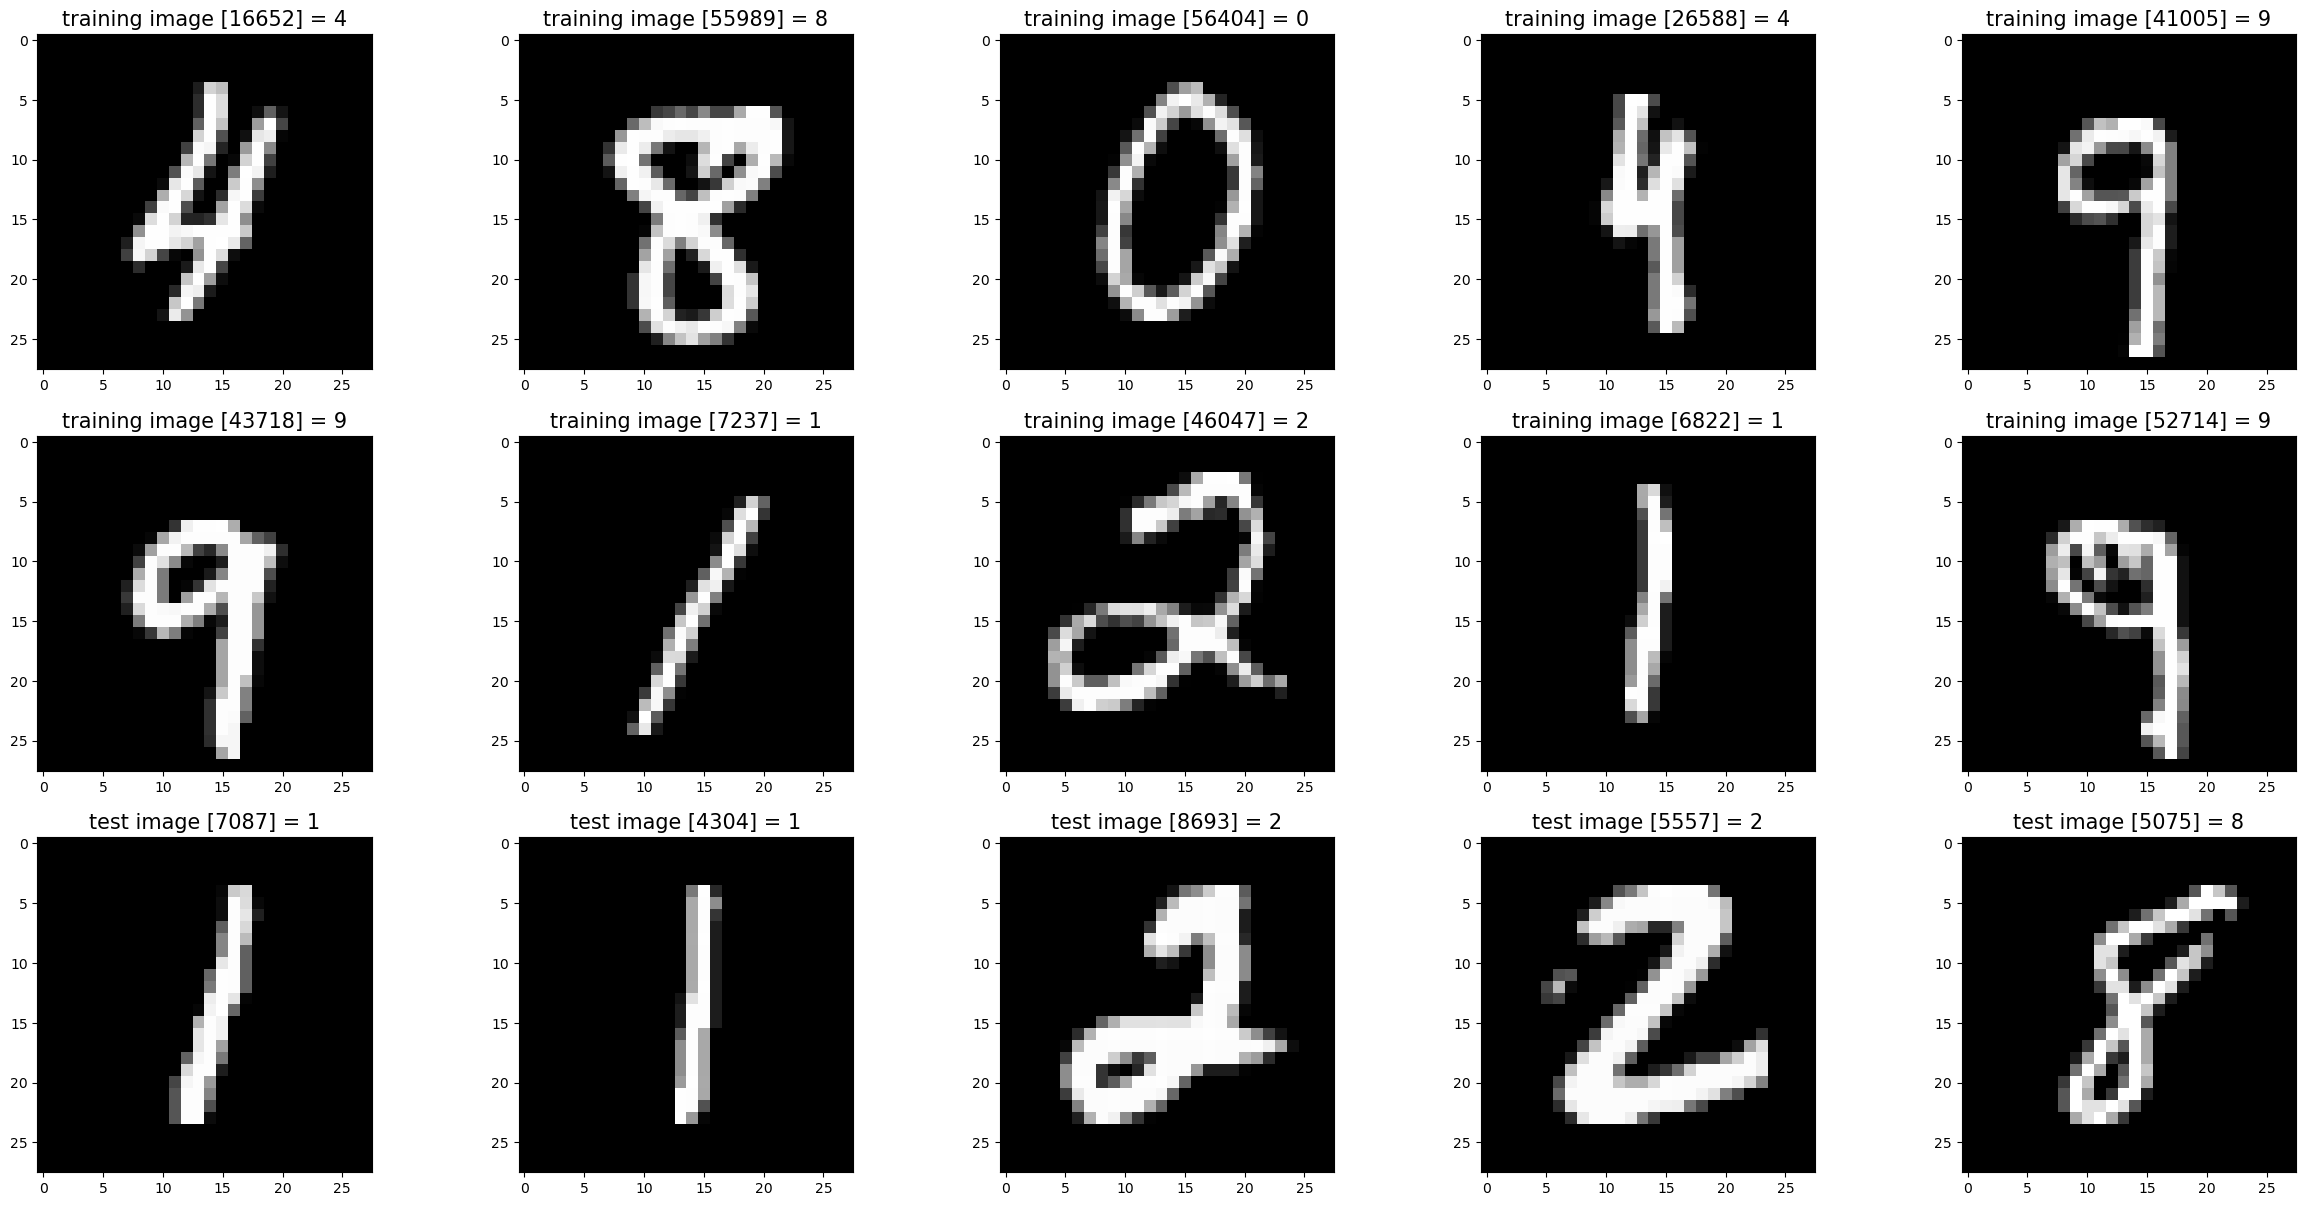

In [59]:
# Verify Reading Dataset via MnistDataloader class
import random
import matplotlib.pyplot as plt

# Set file paths based on added MNIST Datasets
input_path = '/home/alex/Documents/handwritten_recognition_noframework/data/mnist_dataset'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

# Helper function to show a list of images with their relating titles
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

# Load MINST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

# Show some random training and test images 
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

First, we reshape the samples into a flat vector

In [56]:
x_train.shape # N. samples, X and Y dimensions

(784, 60000)

In [60]:
# Flattening the 28x28 images
x_train_flat = x_train.reshape(x_train.shape[0], -1).T
x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Save original labels before one-hot encoding
y_train_original = y_train.copy()
y_test_original = y_test.copy()

y_train = to_one_hot(y_train.reshape(1, y_train.shape[0]), 10)
y_test = to_one_hot(y_test.reshape(1, y_test.shape[0]), 10)

# Normalize pixel values to [0, 1]
x_train = x_train_flat / 255.0
x_test = x_test_flat / 255.0

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))
print("y_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))

x_train shape: (784, 60000)
x_test shape: (784, 10000)
y_train shape: (10, 60000)
y_test shape: (10, 10000)


In [55]:
layers_dims = [x_train.shape[0], 128, 64, 10] # 4-layer model

In [57]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("First 10 labels (one-hot):")
print(y_train[:, :10])
print("Corresponding argmax (original labels):")
print(np.argmax(y_train[:, :10], axis=0))

y_train shape: (10, 60000)
y_test shape: (10, 10000)
First 10 labels (one-hot):
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Corresponding argmax (original labels):
[5 0 4 1 9 2 1 3 1 4]


In [61]:
parameters, costs = L_layer_model(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)

Cost after iteration 0: 2.3258322321509444
Cost after iteration 100: 2.18660420066622
Cost after iteration 100: 2.18660420066622
Cost after iteration 200: 1.9952195434336357
Cost after iteration 200: 1.9952195434336357
Cost after iteration 300: 1.7209643173303457
Cost after iteration 300: 1.7209643173303457
Cost after iteration 400: 1.3982244300092939
Cost after iteration 400: 1.3982244300092939
Cost after iteration 500: 1.1069588549080096
Cost after iteration 500: 1.1069588549080096
Cost after iteration 600: 0.8997453047965469
Cost after iteration 600: 0.8997453047965469
Cost after iteration 700: 0.7639294996478798
Cost after iteration 700: 0.7639294996478798
Cost after iteration 800: 0.6726488888537724
Cost after iteration 800: 0.6726488888537724
Cost after iteration 900: 0.6083492034831297
Cost after iteration 900: 0.6083492034831297
Cost after iteration 1000: 0.56095112201479
Cost after iteration 1000: 0.56095112201479
Cost after iteration 1100: 0.5246772495540212
Cost after iterat

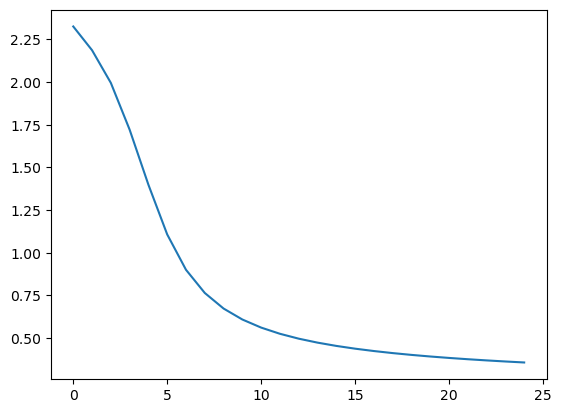

In [62]:
# Plot costs
plt.plot(costs)

In [63]:
predict(x_train, y_train_original, parameters)

Accuracy: 0.90105


array([5, 0, 4, ..., 5, 6, 8], shape=(60000,))

In [64]:
predict(x_test, y_test_original, parameters)

Accuracy: 0.905


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))